# Pandas教程

### 2017七月在线 机器学习线上集训 julyedu.com

### bikes project

In [1]:
import pandas as pd

我们先从CSV文件中读取一些数据。

bike.csv记录了Montreal自行车路线的数据，具体有7条路线，数据记录了每条自行车路线每天分别有多少人。

In [2]:
bikes = pd.read_csv('bikes.csv', encoding='latin1')
# bikes

In [3]:
bikes = pd.read_csv('bikes.csv', sep=';', parse_dates=['Date'], encoding='latin1', dayfirst=True, index_col='Date')
# bikes

更多关于read_csv的说明请查阅documentation

[read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [4]:
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


[```dropna```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)会删除所有带NA的行

In [9]:
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


In [10]:
bikes.dropna(how='all').head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [11]:
bikes.dropna(axis=1, how='all').head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [12]:
bikes.shape

(310, 9)

我们先数一数每一列有多少数据缺失

In [15]:
bikes.apply(lambda x: sum(x.isnull()))

Berri 1                                  0
Brébeuf (données non disponibles)      310
Côte-Sainte-Catherine                    0
Maisonneuve 1                            0
Maisonneuve 2                            0
du Parc                                  0
Pierre-Dupuy                             0
Rachel1                                  0
St-Urbain (données non disponibles)    310
dtype: int64

下面给大家介绍如何填充缺失的数据

In [13]:
row = bikes.iloc[0].copy()
row.fillna(row.mean())

Berri 1                                35.000000
Brébeuf (données non disponibles)      25.142857
Côte-Sainte-Catherine                   0.000000
Maisonneuve 1                          38.000000
Maisonneuve 2                          51.000000
du Parc                                26.000000
Pierre-Dupuy                           10.000000
Rachel1                                16.000000
St-Urbain (données non disponibles)    25.142857
Name: 2012-01-01 00:00:00, dtype: float64

In [25]:
m = bikes.mean(axis=1)
#一行一行去填充
for i, col in enumerate(bikes):
    bikes.iloc[:, i] = bikes.iloc[:, i].fillna(m)
    
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,91.285714,2,104,248,89,3,58,91.285714
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429


In [26]:
bikes[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,91.285714,2,104,248,89,3,58,91.285714
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429


In [27]:
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [29]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [30]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [31]:
berri_bikes.loc[:, 'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


有了weekday信息之后，我们就可以用上我们前面学过的.groupyby把骑车人数按照weekday分类，然后用aggregate算出每个工作日的骑车人数之和。

In [32]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [33]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


接下来我们试试能不能把每条路线都加起来，然后算出一天骑自行车出门的人数之和。
to_frame可以把一个Series转换成一个DataFrame

In [37]:
bikes_sum = bikes.sum(axis=1).to_frame()
bikes_sum.head()
# bikes_sum.index

,0
Date,
2012-01-01,226.285714
2012-01-02,523.285714
2012-01-03,821.571429
2012-01-04,975.857143
2012-01-05,1103.142857


In [40]:
bikes_sum.loc[:, 'weekday'] = bikes_sum.index.weekday
bikes_sum.head()
#type(berri_bikes)

,0,weekday
Date,,
2012-01-01,226.285714,6
2012-01-02,523.285714,0
2012-01-03,821.571429,1
2012-01-04,975.857143,2
2012-01-05,1103.142857,3


In [41]:
weekday_counts = bikes_sum.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,0
Monday,9.192381e+05
Tuesday,8.981769e+05
Wednesday,1.015357e+06
Thursday,1.065946e+06
Friday,9.498497e+05
Saturday,6.643299e+05
Sunday,6.660604e+05


作个简单的图看一看
[plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

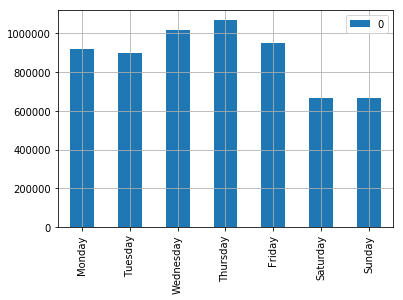

In [45]:
%matplotlib inline
weekday_counts.plot(grid=True, kind="bar")